# Bài tập
1. Hãy thử thay đổi Max_depth để tăng accuracy trên tập testing, vẽ cây với Max_depth đã thay đổi.
2. max_depth ảnh hưởng như thế nào đối với mô hình decision tree, vì sao?
3. Dùng dataset bên dưới, từ mô hình Decision Tree hãy code thêm mô hình Random Forest như thuật toán đã học. Thử tìm hiểu cách dùng Random Forest trong sklearn để so sánh kết quả.

In [1]:
# Import a library
import pandas as pd

In [2]:
# Load data
df = pd.read_csv("bt1.csv", header=None)

In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [4]:
# Split data
from sklearn.model_selection import train_test_split

X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
import category_encoders as ce
import warnings

# Encoding features
warnings.filterwarnings("ignore")
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

## Câu 1

max_depth = 1
Model accuracy score with criterion gini index: 0.6953
Training-set accuracy score: 0.7027
max_depth = 2
Model accuracy score with criterion gini index: 0.8004
Training-set accuracy score: 0.7666
max_depth = 3
Model accuracy score with criterion gini index: 0.8021
Training-set accuracy score: 0.7865
max_depth = 4
Model accuracy score with criterion gini index: 0.8424
Training-set accuracy score: 0.8341
max_depth = 5
Model accuracy score with criterion gini index: 0.8704
Training-set accuracy score: 0.8634
max_depth = 6
Model accuracy score with criterion gini index: 0.8949
Training-set accuracy score: 0.9067
max_depth = 7
Model accuracy score with criterion gini index: 0.9159
Training-set accuracy score: 0.9378
max_depth = 8
Model accuracy score with criterion gini index: 0.9335
Training-set accuracy score: 0.9594
max_depth = 9
Model accuracy score with criterion gini index: 0.9457
Training-set accuracy score: 0.9749
max_depth = 10
Model accuracy score with criterion gini

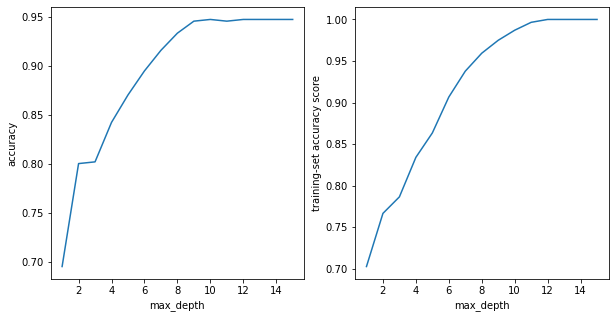

In [6]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

x = []
y = []
z = []
k = 15
for i in range(k):
    clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=i + 1, random_state=0, max_features=None)
    # fit the model
    clf_gini.fit(X_train, y_train)
    print(f'max_depth = {i + 1}')
    accuracy = clf_gini.score(X_test, y_test)
    print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy))
    # Check accuracy trên tập training để xem model có bị overfitting hay không
    y_pred_train_gini = clf_gini.predict(X_train)
    print('Training-set accuracy score: {0:0.4f}'.format(clf_gini.score(X_train, y_train)))
    x.append(i + 1)
    y.append(accuracy)
    z.append(clf_gini.score(X_train, y_train))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.plot(x, y)
ax1.set_xlabel('max_depth')
ax1.set_ylabel('accuracy')
ax2.plot(x, z)
ax2.set_xlabel('max_depth')
ax2.set_ylabel('training-set accuracy score');

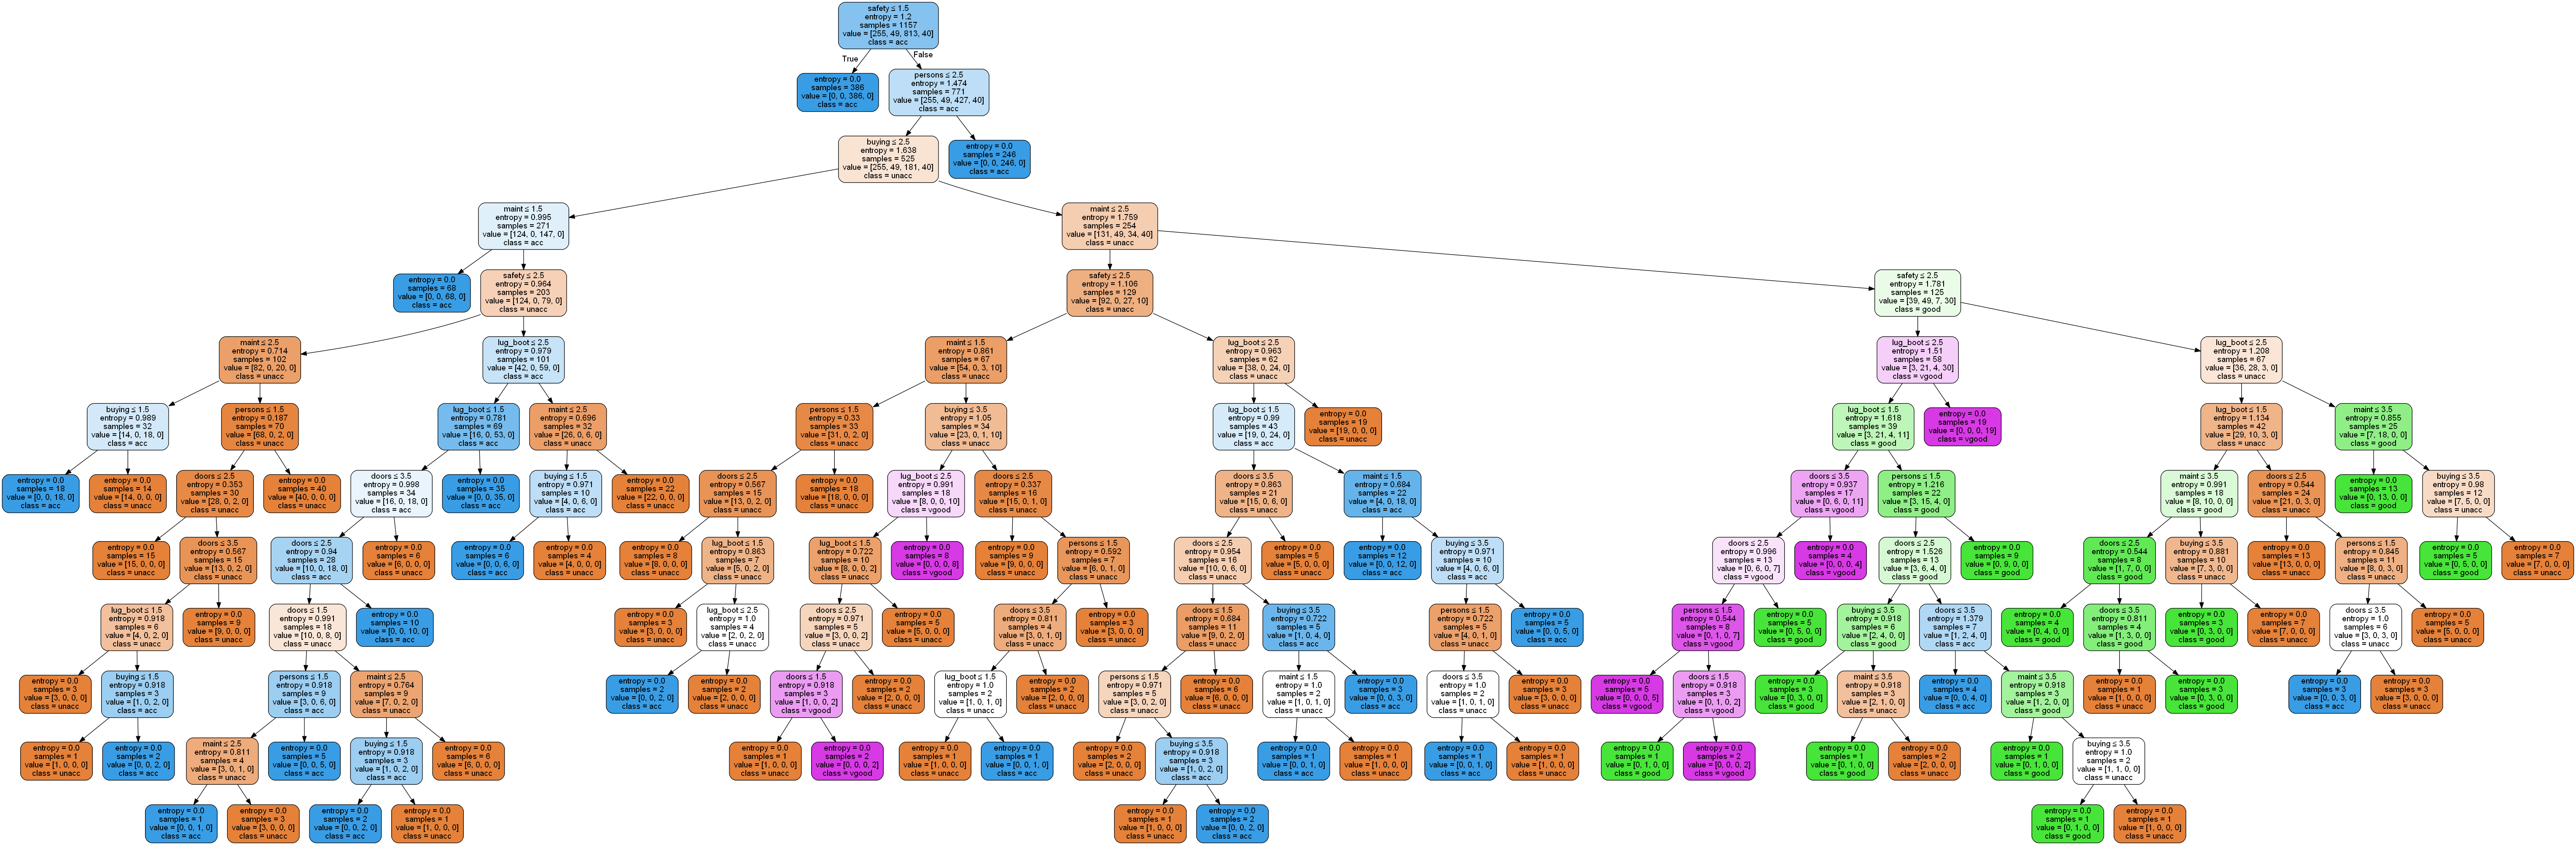

In [7]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Vẽ thử cây
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns, class_names=list(y_train.unique()))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bt1.png')
Image(graph.create_png())

## Câu 2
**Từ Out[6], ta nhận xét như sau:**
* max_depth = 1, model underfitting vì chỉ chia 2 leaf node.
* max_depth > 1 và max_depth < 6, model overfitting.
* max_depth > 5, model balanced.
* max_depth = 12 là điều kiện dừng.

**Kết luận:** *max_depth có ảnh hưởng lớn đến accuracy của model.*

## Câu 3

In [8]:
# Load data
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv("bt2.csv", header=0, names=col_names)

In [9]:
# Split data
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = data[feature_cols]
y = data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Tính accuracy bằng cách tìm các parameters tốt nhất cho cây

In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion": ("gini", "entropy"),
    "splitter": ("best", "random"),
    "max_depth": (list(range(1, 20))),
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": list(range(1, 20)),
}
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


In [11]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(tree_clf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.1420 ± 0.0637,glucose
0.0580 ± 0.0331,bmi
0.0390 ± 0.0226,age
0.0104 ± 0.0161,bp
0.0009 ± 0.0168,pedigree
0 ± 0.0000,insulin
0 ± 0.0000,skin
0 ± 0.0000,pregnant


In [12]:
from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7878787878787878


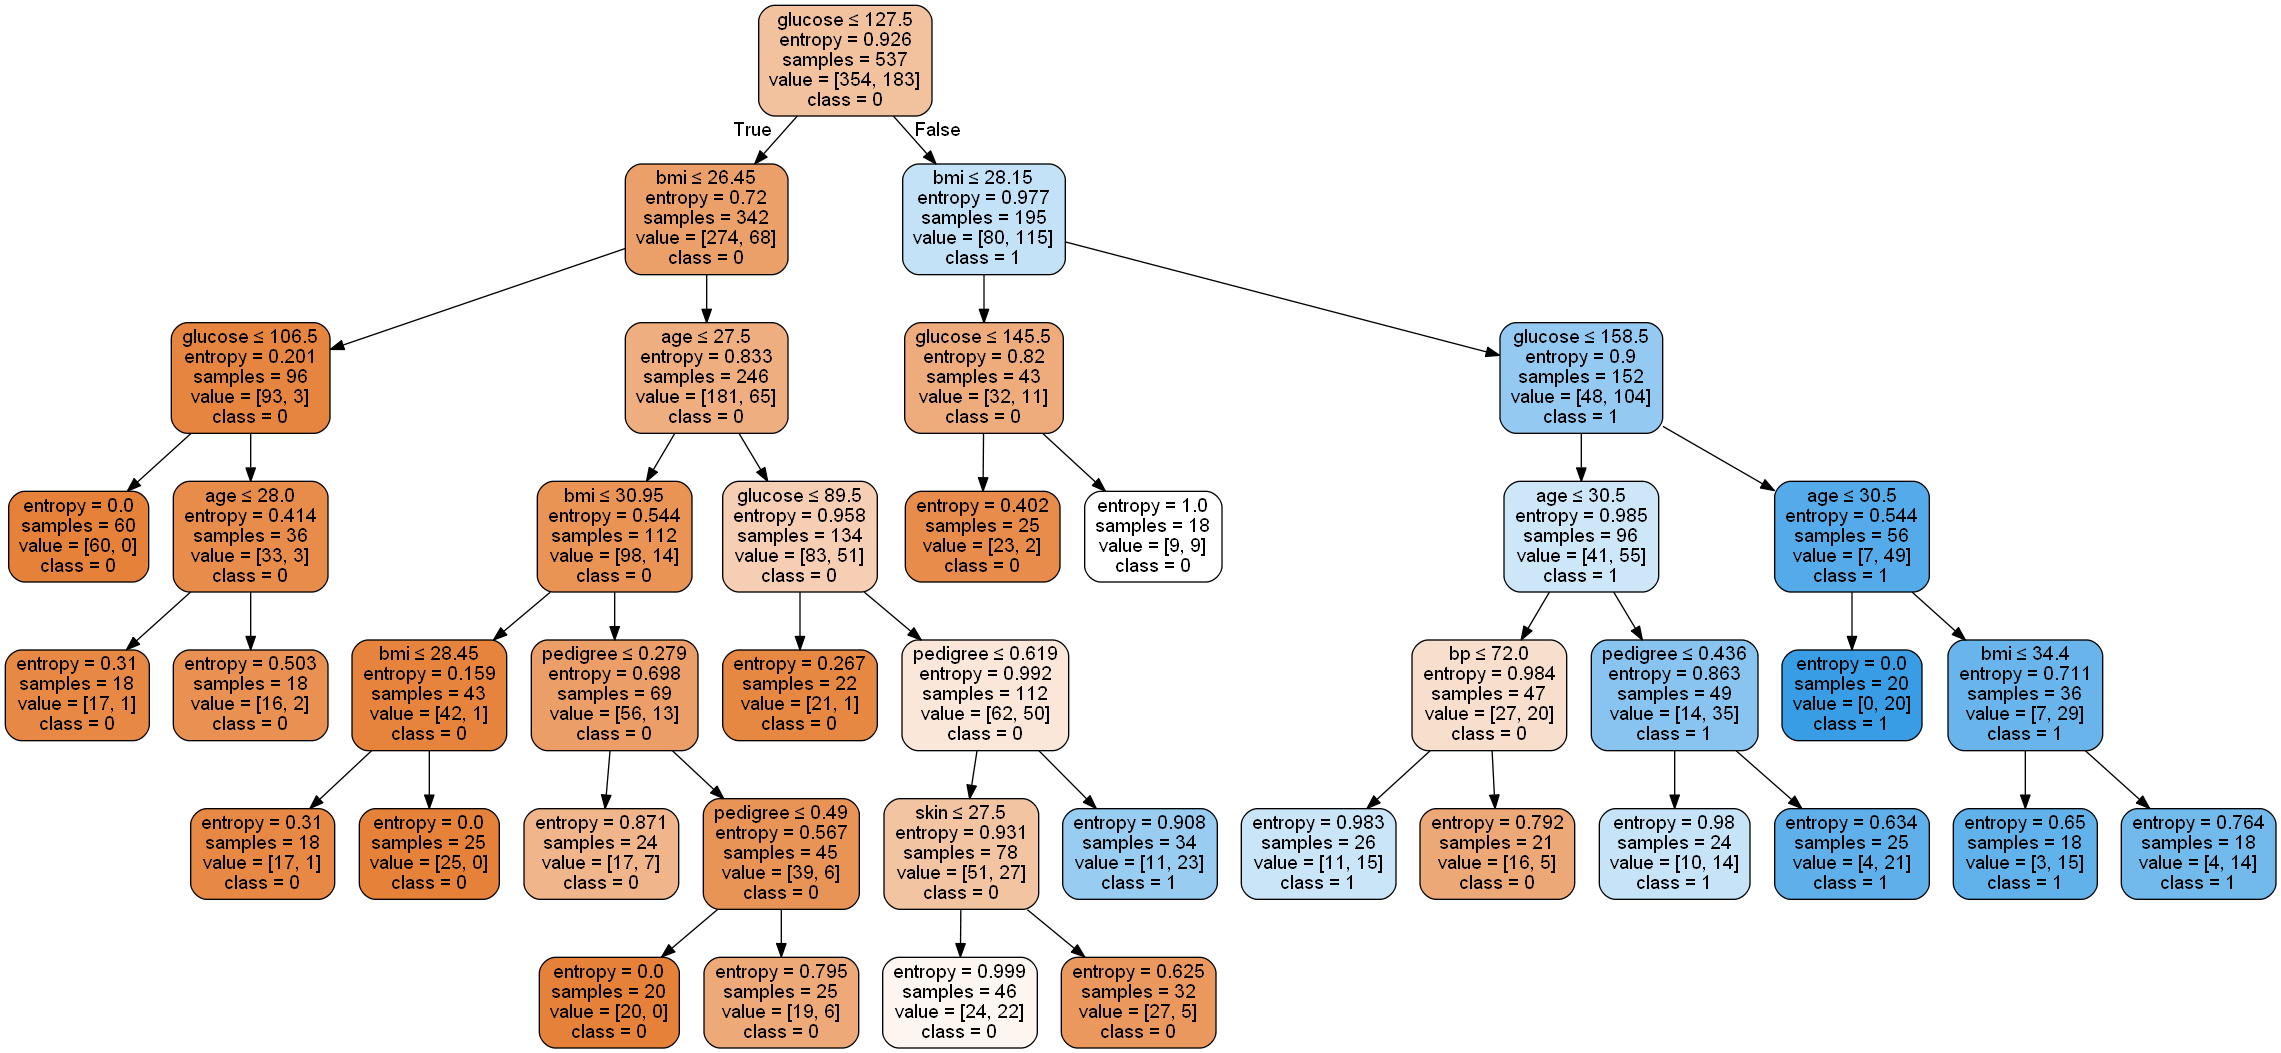

In [13]:
#Vẽ thử cây
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

### Tính accuracy bằng cách dùng thư viện sklearn

In [14]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

np.random.seed(2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.7878787878787878

### Tính accuracy bằng cách từ mô hình Decision Tree code thêm mô hình Random Forest như thuật toán đã học

In [15]:
def bootstrapping(train_df, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    return df_bootstrapped


def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped = bootstrapping(train_df, n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)
    return forest


def random_forest_predictions(test_df, forest):
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = decision_tree_predictions(test_df, tree=forest[i])
        df_predictions[column_name] = predictions
    df_predictions = pd.DataFrame(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    return random_forest_predictions

In [16]:
import random
from helper_functions import train_test_split, calculate_accuracy
from decision_tree_functions import decision_tree_algorithm, decision_tree_predictions

random.seed(1)
train_data, test_data = train_test_split(data, test_size=0.3)

In [17]:
forest = random_forest_algorithm(train_data, n_trees=10, n_bootstrap=500, n_features=2, dt_max_depth=6)
predictions = random_forest_predictions(test_data, forest)
accuracy = calculate_accuracy(predictions, test_data.label)
print("Accuracy = {}".format(accuracy))

Accuracy = 0.7695652173913043
